In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\archive (1)\train_u6lujuX_CVtuZ9i (1).csv")

print(df.head())
print(df.info())
print(df.isnull().sum())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [7]:
# Step 1: Basic cleaning
# 1) trim spaces in string columns
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].str.strip()

# 2) convert obvious numeric columns if they are strings
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 3) missing value summary
print("Missing:\n", df.isnull().sum())

# 4) fill numeric missing with median, categorical with mode
for c in df.columns:
    if df[c].dtype in [np.float64, np.int64]:
        df[c] = df[c].fillna(df[c].median())
    else:
        df[c] = df[c].fillna(df[c].mode().iloc[0])



Missing:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [8]:
# Step 2: Feature engineering (optional but useful)
# Example: total income
if 'ApplicantIncome' in df.columns and 'CoapplicantIncome' in df.columns:
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Example: log transform skewed money features
if 'LoanAmount' in df.columns:
    df['LoanAmount_log'] = np.log1p(df['LoanAmount'])

# Drop ID column if exists
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)

print(df.head())


  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  Total_Income  LoanAmount_log  
0         Urban           Y        5849.0        4.859812  
1 

In [11]:
# Step 3: Prepare X and y
# Replace 'Loan_Status' with your actual target column name if different
target = 'Loan_Status'   # usually 'Y'/'N' or 1/0

# if Loan_Status is 'Y'/'N', convert to 1/0
if df[target].dtype == object:
    df[target] = df[target].map({'Y':1, 'N':0}).fillna(df[target])

# Target and features
y = df[target]
X = df.drop(columns=[target])

# Show output shapes and few rows
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

print("\nSample features (X):")
print(X.head())

print("\nSample target (y):")
print(y.head())


Shape of X (features): (614, 13)
Shape of y (target): (614,)

Sample features (X):
  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  Total_Income  LoanAmou

In [12]:
# Step 4: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Show output shapes
print("Training set shape (X_train):", X_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Test target shape (y_test):", y_test.shape)

# Show few sample values
print("\nSample X_train rows:")
print(X_train.head())

print("\nSample y_train values:")
print(y_train.head())



Training set shape (X_train): (491, 13)
Test set shape (X_test): (123, 13)
Training target shape (y_train): (491,)
Test target shape (y_test): (123,)

Sample X_train rows:
    Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
154   Male      No          0      Graduate            No             3254   
239   Male     Yes          1      Graduate            No             3315   
448   Male     Yes          2      Graduate            No             3340   
471   Male     Yes          1  Not Graduate            No             2653   
273   Male     Yes          0      Graduate            No             2620   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
154                0.0        50.0             360.0             1.0   
239                0.0        96.0             360.0             1.0   
448             1710.0       150.0             360.0             0.0   
471             1500.0       113.0             180.0             0.0   

In [13]:
# Step 5: Preprocessing (Encode categoricals + Scale numericals)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify categorical & numerical columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

print("Categorical Columns:", list(cat_cols))
print("Numerical Columns:", list(num_cols))

# Preprocessor: OneHotEncoder for categoricals, StandardScaler for numericals
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Fit & transform training data, transform test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nAfter preprocessing:")
print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)


Categorical Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Numerical Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'LoanAmount_log']

After preprocessing:
X_train_processed shape: (491, 22)
X_test_processed shape: (123, 22)


In [14]:
# Step 6: Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model initialize
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train_processed, y_train)

# Predict on test data
y_pred = model.predict(X_test_processed)

# Evaluation
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy on Test Data: 0.8617886178861789

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Confusion Matrix:
[[22 16]
 [ 1 84]]


In [15]:
# Step 7: Trying other models for comparison
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_processed, y_train)
dt_pred = dt_model.predict(X_test_processed)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)
rf_pred = rf_model.predict(X_test_processed)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Quick comparison
print("\nModel Comparison:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Decision Tree Accuracy: 0.7154471544715447
Random Forest Accuracy: 0.8292682926829268

Model Comparison:
Logistic Regression Accuracy: 0.8617886178861789
Decision Tree Accuracy: 0.7154471544715447
Random Forest Accuracy: 0.8292682926829268


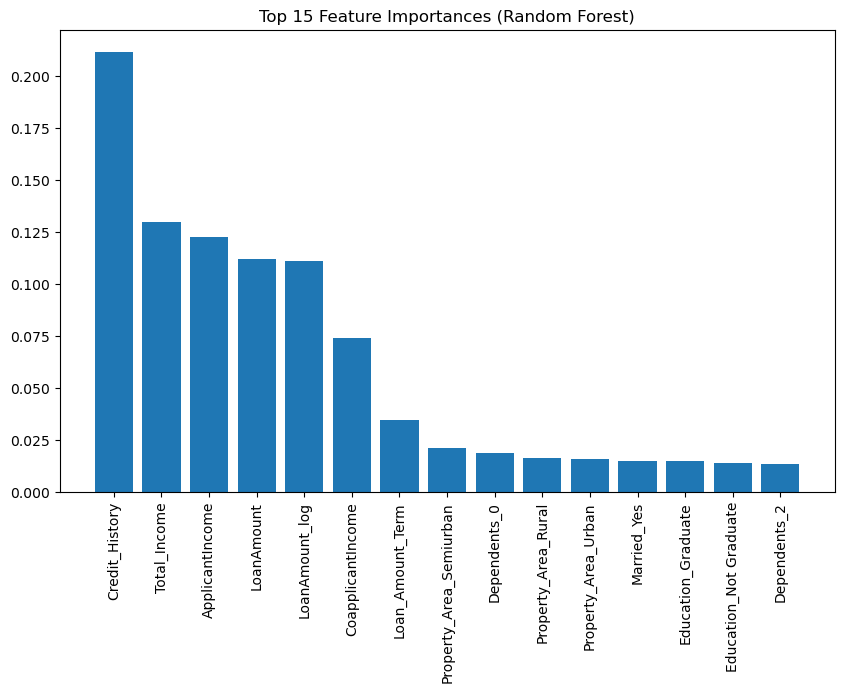

In [16]:
# Step 8: Feature Importance from Random Forest
import matplotlib.pyplot as plt
import numpy as np

# Get feature names from preprocessing
# OneHotEncoder ke features kaam se extract karte hain
cat_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))
all_features = list(num_cols) + cat_features

# Feature importance values
importances = rf_model.feature_importances_

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot top 15 important features
plt.figure(figsize=(10,6))
plt.bar(range(15), importances[indices[:15]], align='center')
plt.xticks(range(15), [all_features[i] for i in indices[:15]], rotation=90)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()
